# Air Quality Index Prediction Model

### Name: Sharath M

### Organization: Entri Elevate

### Date:

### Overview of Problem Statement:
AQI prediction involves developing a model that can accurately forecast the Air Quality Index (AQI) for a given location. This prediction is crucial for public health. So this prediction problem aims to provide accurate information about air quality conditions, enabling proactive measures to mitigate pollution and protect public health.

### Objective:
To develop the best AQI prediction model using machine learning techniques.

### Data Description:
Source: https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset

Features: Country, City, AQI Value, AQI Category, CO AQI Value, CO AQI Category, Ozone AQI Value, Ozone AQI Category, NO2 AQI Value, NO2 AQI Category, PM2.5 AQI Value, PM2.5 AQI Category

### Importing libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [55]:
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [56]:
df = pd.read_csv('Desktop/Entri/Internship/global air pollution dataset.csv')
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


### Data Exploration

In [57]:
# Display the column names, data types, non-null count and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [58]:
# Finding the statistical summary

df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [59]:
df.shape

(23463, 12)

In [60]:
# Finding the total number of unique countries

No_of_countries = len(df['Country'].unique())
print('Number of unique countries:',No_of_countries)

Number of unique countries: 176


In [61]:
df['Country'].value_counts()

Country
United States of America    2872
India                       2488
Brazil                      1562
Germany                     1345
Russian Federation          1241
                            ... 
Vanuatu                        1
Solomon Islands                1
Republic of Korea              1
Saint Lucia                    1
Monaco                         1
Name: count, Length: 175, dtype: int64

In [62]:
# Checking the null values

df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

We can observe that there are 427 null values column Country and 1 null value in column City.

### Data Preprocessing

In [63]:
# Removing the null values in Country and City

df = df.dropna(subset = ['Country','City'])
df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

Now there are no null values in the data frame.

In [64]:
# Finding the duplicated rows

duplicated_rows = df[df.duplicated()]
print('Duplicated rows:')
print(duplicated_rows)  

Duplicated rows:
Empty DataFrame
Columns: [Country, City, AQI Value, AQI Category, CO AQI Value, CO AQI Category, Ozone AQI Value, Ozone AQI Category, NO2 AQI Value, NO2 AQI Category, PM2.5 AQI Value, PM2.5 AQI Category]
Index: []


Duplicated rows are not found in the data frame

<Axes: >

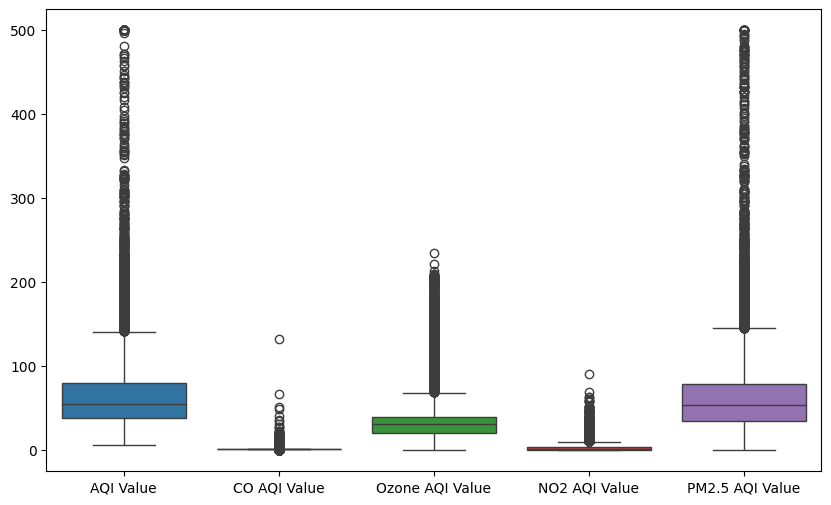

In [65]:
# To see the outliers

plt.figure(figsize=(10,6))
sns.boxplot(df)

In [66]:
# Select numerical columns for outlier detection

numeric_columns = ['AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']

# Compute Z-score for selected numeric columns
z_score = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()

# Set threshold
threshold = 3

# Find outliers
outliers = (z_score > threshold) | (z_score < -threshold)

print('Outliers:')
print(outliers.sum())

Outliers:
AQI Value          271
CO AQI Value       265
Ozone AQI Value    749
NO2 AQI Value      593
PM2.5 AQI Value    283
dtype: int64


In [67]:
# Handling the ouliers using the impute method
# Function to replace outliers with column median
def replace_outliers(column):
    mean = column.mean()
    column[outliers[column.name]] = mean
    return column

# Apply the function to each column
df[numeric_columns] = df[numeric_columns].apply(replace_outliers)

<Axes: >

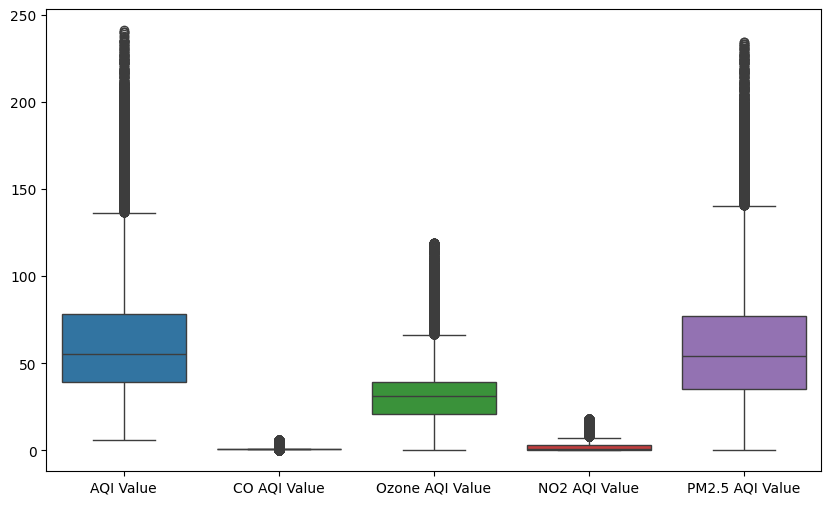

In [68]:
# Boxplot after handling outliers

plt.figure(figsize=(10,6))
sns.boxplot(df)

Original Skewness: [1.48444654 1.85478366 1.4267244  2.11949638 1.33167937]


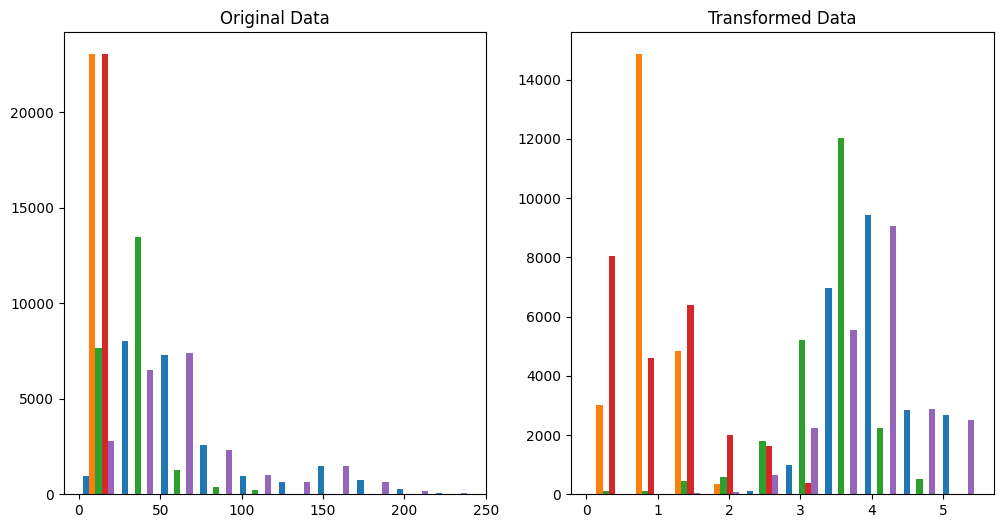

Transformed Skewness: [ 0.35453077  0.13119835 -1.63892172  0.50743512 -0.24394053]


In [69]:
# Addressing skewed data in numerical features
from scipy.stats import skew

numeric_columns = ['AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']
# Visualize original data
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.hist(df[numeric_columns])
plt.title('Original Data')

# Calculate skewness
original_skewness = skew(df[numeric_columns])
print("Original Skewness:",original_skewness)

# Apply log transformation
log_transformed = np.log1p(df[numeric_columns])

# Visualize transformed data
plt.subplot(1,2,2)
plt.hist(log_transformed)
plt.title('Transformed Data')
plt.show()

# Skewness after transformation
log_skewness = skew(log_transformed)
print("Transformed Skewness:",log_skewness)

### Data Visualization

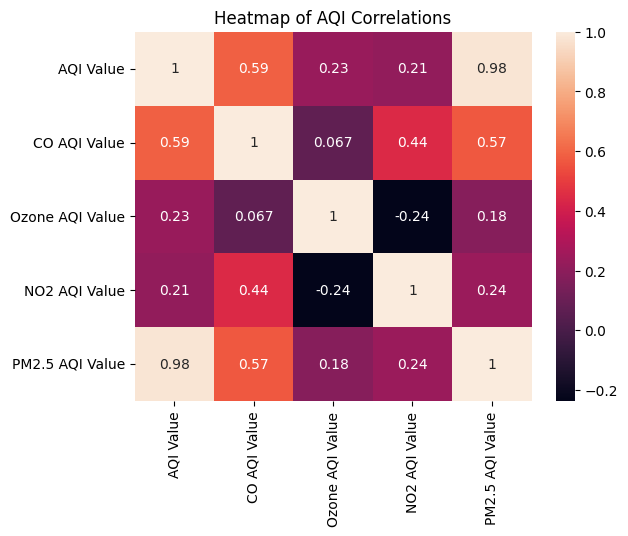

In [70]:
# Heatmap

numerical_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
corr_matrix = df[numerical_columns].corr()

sns.heatmap(corr_matrix, annot=True)
plt.title('Heatmap of AQI Correlations')
plt.show()

Positively Correlated: 

AQI Value and PM2.5 AQI Value are positively correlated

Neagatively Correlated:

Ozone AQI Value and NO2 AQI Value are negatively correlated

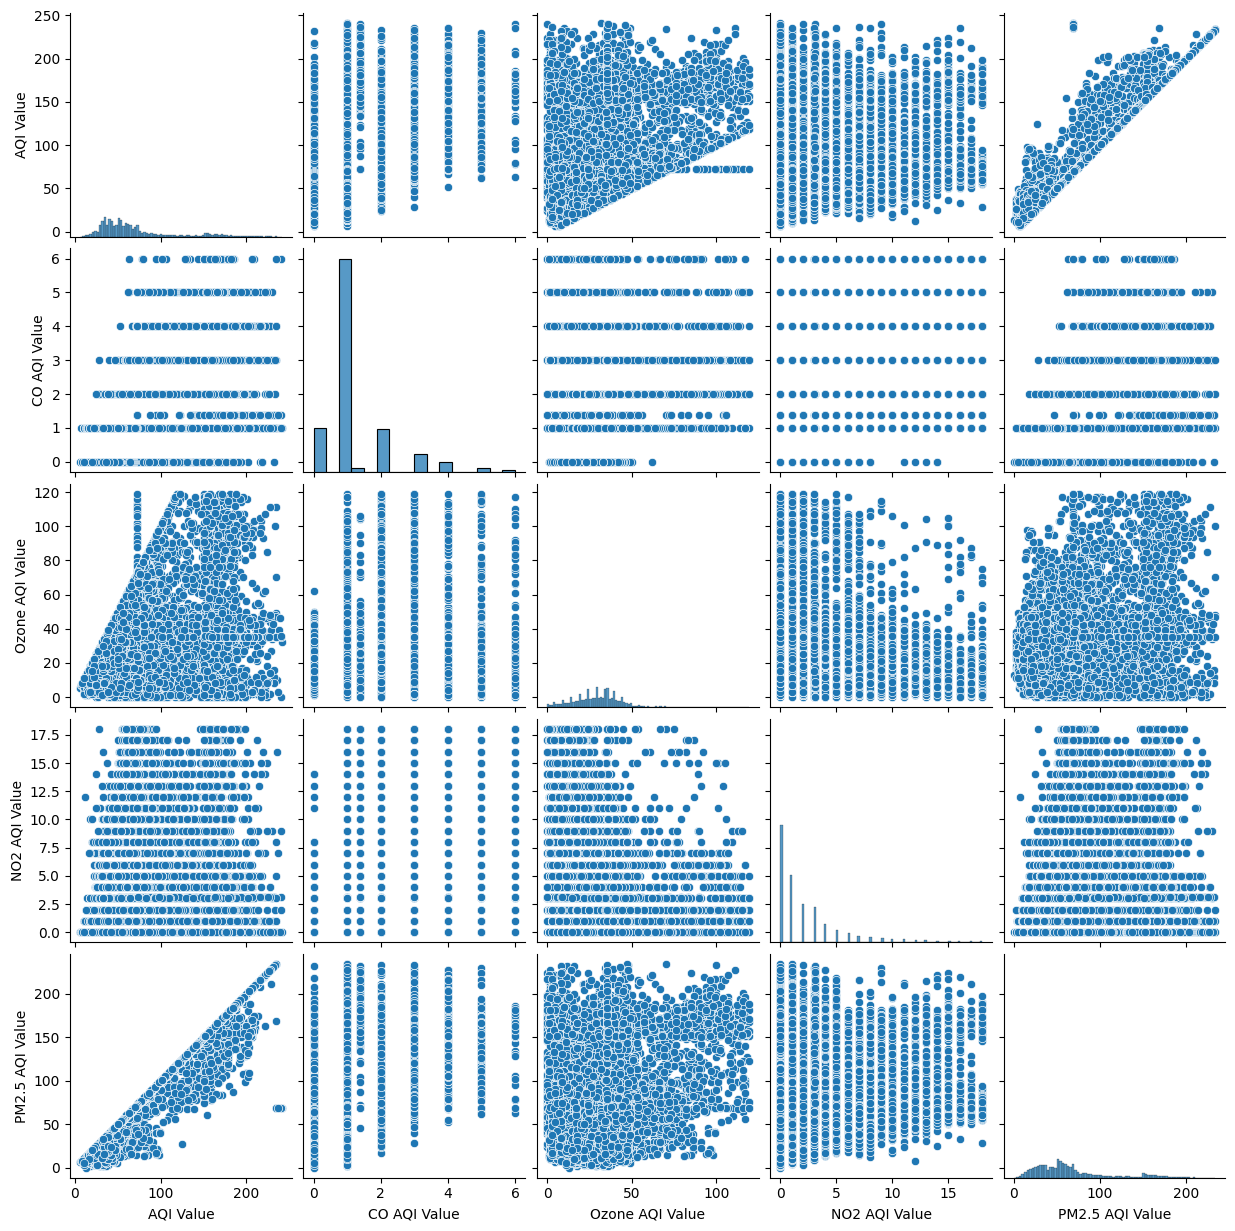

In [71]:
# Scatter plot

numerical_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

sns.pairplot(df[numerical_columns])

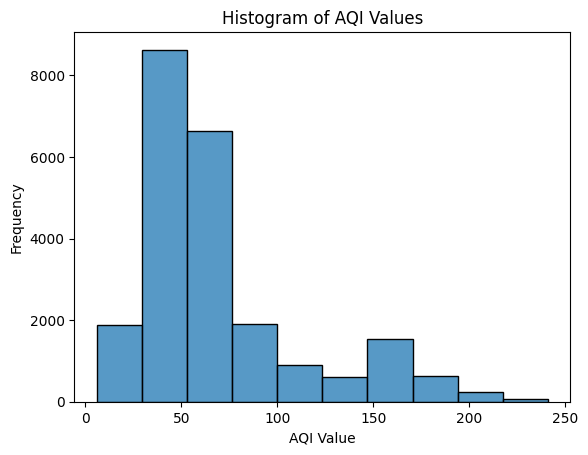

In [72]:
# Histogram 

sns.histplot(df['AQI Value'], bins=10)
plt.title('Histogram of AQI Values')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.show()

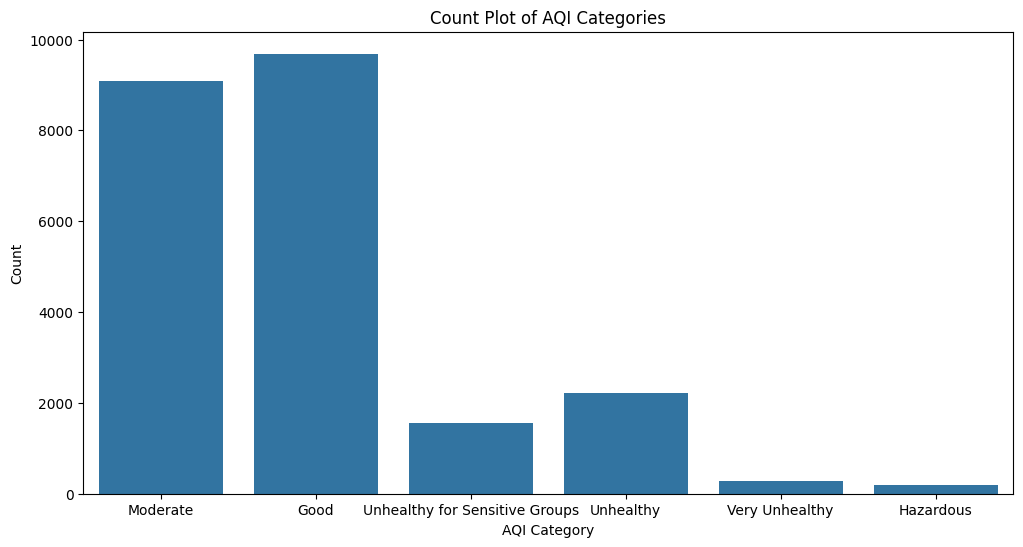

In [73]:
# Count plot

plt.figure(figsize=(12, 6))
sns.countplot(data = df, x = 'AQI Category')
plt.title('Count Plot of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.show()

### Feature Engineering

This dataset includes categorical data such as Country, City, AQI Category, CO AQI Category, Ozone AQI Category, NO2 AQI Category, PM2.5 AQI Category. So we need to perform 'Label Encoding' to convert these categorical values into numerical values.

In [74]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns = ['Country', 'City', 'AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

df.head(2)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,130,16220,51.0,2,1.0,0,36.0,0,0.0,0,51.0,2
1,22,16240,41.0,0,1.0,0,5.0,0,1.0,0,41.0,0


### Feature Selection

In [75]:
# Using SelectKBest

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

In [76]:
x = df.drop('AQI Value', axis=1)
y = df['AQI Value']

#x = pd.get_dummies(x, drop_first=True)

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Initialize SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_regression, k=8)
x_selected = selector.fit_transform(x_train, y_train)

# Select indices of selected features
selected_indices = selector.get_support(indices = True)

# Get the names of selected features
selected_features = x.columns[selected_indices] 

print('Selected Features:',selected_features)

Selected Features: Index(['Country', 'AQI Category', 'CO AQI Value', 'Ozone AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')


In [77]:
# Using Random Forest

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [78]:
# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a pandas series
feature_importances = pd.Series(importances, index=x.columns)

# Sort the feature importances
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

# Set a threshold
selected_features = feature_importances[feature_importances > 0.01].index
print('\n',selected_features)

AQI Category          8.692339e-01
PM2.5 AQI Value       1.124596e-01
Ozone AQI Value       9.216724e-03
Ozone AQI Category    2.848891e-03
City                  2.698044e-03
NO2 AQI Value         9.825948e-04
CO AQI Value          8.802279e-04
PM2.5 AQI Category    8.329634e-04
Country               8.227654e-04
NO2 AQI Category      2.418108e-05
CO AQI Category       1.404888e-07
dtype: float64

 Index(['AQI Category', 'PM2.5 AQI Value'], dtype='object')


The above 2 feature selection shows AQI Category and PM2.5 AQI Value have more importance. But while calculating the AQI Value, the value of other pollutants like CO AQI Value, Ozone AQI Value, NO2 AQI Value are also effect the value of AQI.  

In [79]:
# Removing irrelevant columns

AQI = df.drop(columns = ['City','NO2 AQI Category','CO AQI Category','Ozone AQI Category'])
AQI.head(2)

,Country,AQI Value,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
0,130,51.0,2,1.0,36.0,0.0,51.0,2
1,22,41.0,0,1.0,5.0,1.0,41.0,0


### Feature Scaling

In [80]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

scaled_features = minmax_scaler.fit_transform(AQI[['AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']])
scaled_features

array([[0.19148936, 0.16666667, 0.30252101, 0.        , 0.21794872],
       [0.14893617, 0.16666667, 0.04201681, 0.05555556, 0.17521368],
       [0.25531915, 0.16666667, 0.32773109, 0.11111111, 0.28205128],
       ...,
       [0.18723404, 0.16666667, 0.18487395, 0.05555556, 0.21367521],
       [0.27659574, 0.16666667, 0.3697479 , 0.11111111, 0.3034188 ],
       [0.27234043, 0.16666667, 0.31932773, 0.        , 0.2991453 ]])

### Splitting the Data

In [81]:
# Separating feature and target variable

x = AQI.drop('AQI Value', axis=1)
y = AQI['AQI Value']

In [82]:
# Splitting the data into training and testing

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [83]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (18428, 7)
Shape of x_test: (4607, 7)
Shape of y_train: (18428,)
Shape of y_test: (4607,)


### Building and Evaluating the Machine Learning Models

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [85]:
# Linear Regression
# Create and train the model

linear = LinearRegression()
linear.fit(x_train, y_train)

# Make predictions and evaluate

y_pred = linear.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)
print("R2 Score:", r2)

Mean Squared Error: 72.18354979046059
Mean Absolute Error: 4.628653823480409
Root Mean Squared Error: 8.496090264966622
R2 Score: 0.9593945491042095


In [86]:
# Random Forest Regression
# Create and train the model

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# Make predictions and evaluate

y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)
print("R2 Score:", r2)

Mean Squared Error: 25.445196348905874
Mean Absolute Error: 0.4770542523133967
Root Mean Squared Error: 5.044323180457996
R2 Score: 0.9856863000797477


In [87]:
# Gradient Boost Regression
# Create and train the model

gb = GradientBoostingRegressor()

gb.fit(x_train, y_train)

# Make predictions and evaluate

y_pred = gb.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)
print("R2 Score:", r2)

Mean Squared Error: 22.00269509830798
Mean Absolute Error: 1.3971517760477246
Root Mean Squared Error: 4.690703049470088
R2 Score: 0.9876228121506506


In [88]:
# Support Vector Regression(SVR)
# Create and train the model

svr = SVR()
svr.fit(x_train, y_train)

# Make predictions and evaluate

y_pred = svr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)
print("R2 Score:", r2)

Mean Squared Error: 59.21973436809742
Mean Absolute Error: 2.551118229569718
Root Mean Squared Error: 7.6954359439928695
R2 Score: 0.9666870911319005


In [89]:
# AdaBoost Regression
# Create and train the model

adaboost = AdaBoostRegressor()
adaboost.fit(x_train, y_train)

# Make predictions and evaluate

y_pred = adaboost.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)
print("R2 Score:", r2)

Mean Squared Error: 106.00871608512222
Mean Absolute Error: 6.903069683343846
Root Mean Squared Error: 10.296053422798574
R2 Score: 0.9403668602054662


In [90]:
# Multilayer Perceptron(MLP) Regressor
# Create and train the model

mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)

# Make predictions and evaluate

y_pred = mlp.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)
print("R2 Score:", r2)

Mean Squared Error: 29.307603512096474
Mean Absolute Error: 1.280701610993902
Root Mean Squared Error: 5.413649740433572
R2 Score: 0.9835135781111031


In [91]:
# Cross Validation
from sklearn.model_selection import KFold, cross_val_score

X = AQI.drop('AQI Value', axis=1)
Y = AQI['AQI Value']

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'GradientBoost': GradientBoostingRegressor(),
    'SVR': SVR(),
    'AdaBoost': AdaBoostRegressor(),
    'MLP': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Define the cross-validator
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation and store results
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, Y, cv=kf)
    results[name] = cv_scores
    print(f"\n{name} cross-validation scores: {cv_scores}")
    print(f"Mean of cross-validation score: {np.mean(cv_scores)}")

# Print summary of results
print("\nSummary of Cross-Validation Results:")
for name, scores in results.items():
    print(f"{name}: Mean = {np.mean(scores):.3f}, Std = {np.std(scores):.3f}")


Linear Regression cross-validation scores: [0.96370859 0.9543889  0.96220443 0.96907565 0.96061627 0.9655246
 0.96083533 0.96098929 0.97182752 0.9603916 ]
Mean of cross-validation score: 0.9629562167101515

Random Forest cross-validation scores: [0.9882207  0.98235343 0.99031579 0.99040377 0.98981393 0.98946812
 0.99134958 0.98715899 0.99571107 0.98540349]
Mean of cross-validation score: 0.9890198863696181

GradientBoost cross-validation scores: [0.98987968 0.98510299 0.98951177 0.98993304 0.98649186 0.99212513
 0.9895069  0.98970296 0.99449198 0.98650264]
Mean of cross-validation score: 0.989324895586193

SVR cross-validation scores: [0.96770779 0.96651798 0.96588125 0.97844238 0.97081903 0.97160551
 0.9662807  0.97034007 0.97741388 0.96786584]
Mean of cross-validation score: 0.9702874416732306

AdaBoost cross-validation scores: [0.94174478 0.94500356 0.95158739 0.95768609 0.95408197 0.94313506
 0.95422861 0.94596569 0.94872647 0.95372288]
Mean of cross-validation score: 0.9495882504

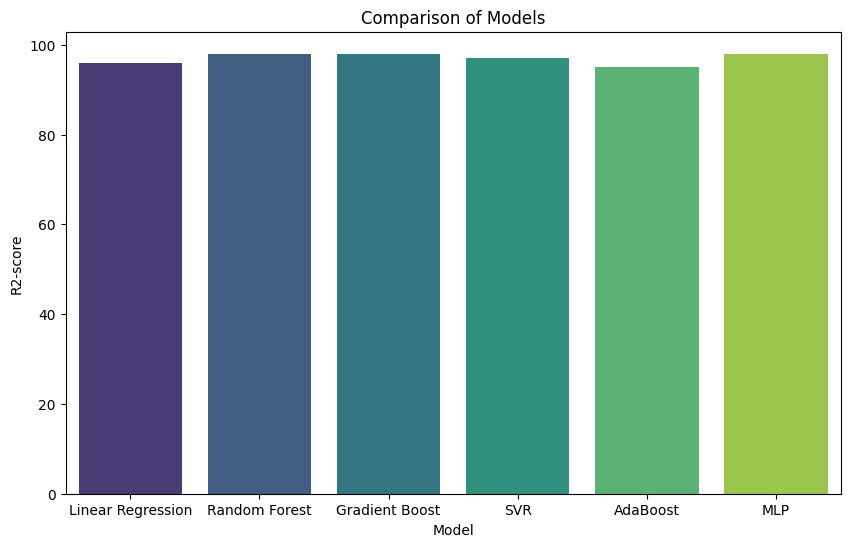

In [92]:
# Comparing the models

model_names = ['Linear Regression', 'Random Forest', 'Gradient Boost', 'SVR', 'AdaBoost', 'MLP']
r2_score = [96, 98, 98, 97, 95, 98]

data = {'Model':model_names, 'R2-score':r2_score} 

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))  
sns.barplot(x='Model', y='R2-score', data=df, palette='viridis')
plt.xlabel('Model')
plt.ylabel('R2-score')
plt.title('Comparison of Models')
plt.show()

### Conclusion

After evaluating the cross validation, the Random forest regressor, Gradient boost and Multilayer Perceptron(MLP) Regressor models are emerged as the top performers, achieving good R2 score of 0.98(98%) respectively. And Linear Regression, Support Vector Regressor and AdaBoost also perform very well with R2 scores of 0.96(96%), 0.97(97%), 0.95(95%) respectively, indicating strong predictive capabilities.

So we can consider the Random forest regressor or Gradient boost or Multilayer Perceptron(MLP) Regressor as the best model for predicting the AQI value with this dataset.

Overall this project contributes to our understanding of AQI value prediction.